In [4]:
import shap
from sklearn.datasets import load_iris
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#SHAP function

def plot_shap(shap_values,ax, color_bar, **kwargs):
   
    plt.sca(ax)
    
    shap.plots.beeswarm(shap_values, show=False, s=24, plot_size=None, color_bar=False)
    
    if 'set_title' in kwargs.keys():
        ax.set_title(**kwargs['set_title'])
    
    if 'set_xlabel' in kwargs.keys():
        ax.set_xlabel(**kwargs['set_xlabel'])

    if 'set_xlim' in kwargs.keys():
        ax.set_xlim(**kwargs['set_xlim'])
        
    if 'set_xticks' in kwargs.keys():
        ax.set_xticks(**kwargs['set_xticks'])

    if 'tick_params' in kwargs.keys():
        ax.tick_params(**kwargs['tick_params'])
        #ax.tick_params(axis='both', which='major', labelsize=14, colors='black')

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    if color_bar == True:
       
        colorbar_ax = plt.colorbar(ax=ax, format='{x:.1f}')
        
        vmin, vmax = np.min(colorbar_ax.get_ticks()), np.max(colorbar_ax.get_ticks())
        colorbar_ax.mappable.set_clim(vmin=vmin, vmax=vmax)
        colorbar_ax.set_ticks(ticks = [vmin, vmax], labels=['Low', 'High'], size = 12)
        
        colorbar_ax.set_label(label='Feature value', size = 16, labelpad=20, y=0.5)
        
        colorbar_ax.outline.set_visible(False)
        colorbar_ax.ax.tick_params(axis='both', top=False, right=False, bottom=False, left=False)
         

In [6]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values_test = explainer(X_test)
print(f"Shape of SHAP value:{shap_values_test.values.shape}")  

Shape of SHAP value:(45, 4, 3)


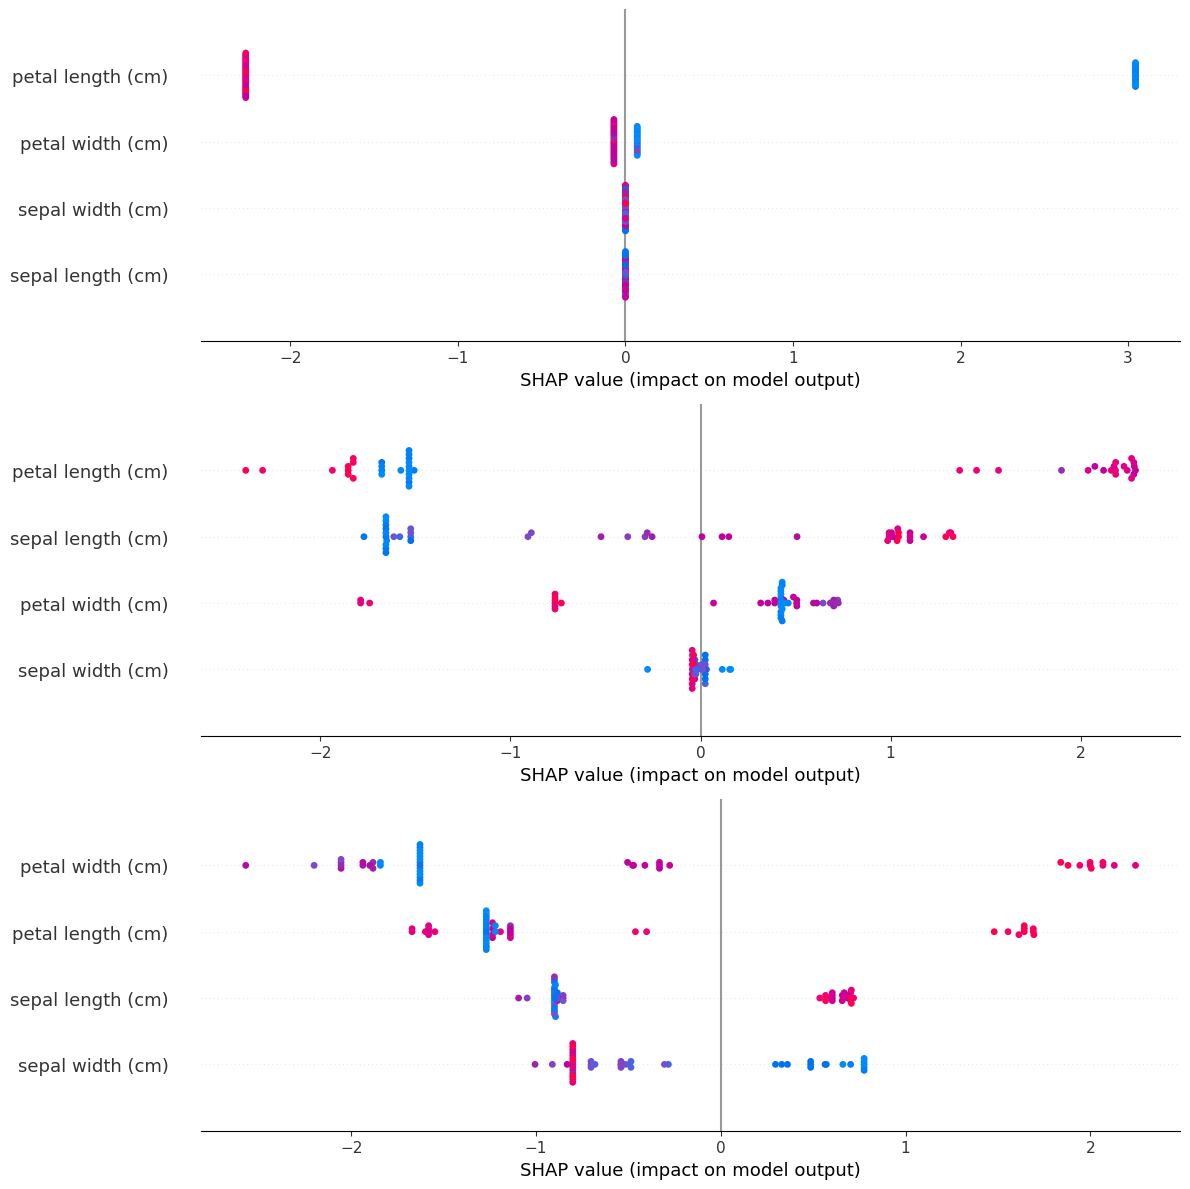

In [7]:

fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(3, 1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])

ax = [ax1, ax2, ax3]

## Plot SHAP results (generic version) ##

for k in range(shap_values_test.values.shape[2]):
    
    plot_shap(shap_values=shap_values_test[...,k], ax=ax[k], color_bar=False)

plt.tight_layout()
plt.show()